# Analysis of App Store and Google Play apps

In this project, we are pretending to be working as data analyst for company that builds mobile apps. 

The task would be analyze apps from platforms mentioned above. The main purpose of such task will be to find apps that atracts more users to decide what kind of apps we should focus on. Our field of interest consider just English speaking customers and we also produce free apps only, profiting from adds.

In the first step, we would create app that fits the most popular category. If the app has good response in the future, we are going to deploy iOS version on iOS App Store. So, we need to find app patterns, that would most likely be successful on both platforms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 
import seaborn as sns

## Getting the data 

In fact, there is around 4 milion apps in the market. Such large amount of data would need 
a lot of time resources, so we could try to find if there are any datasets available online.

Fortunately, Kaggle.com provides a great use for our case - two promising datasets containing app data information could be found on the site:

[Android Google Play Store](https://www.kaggle.com/lava18/google-play-store-apps)

[Apple iOS App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)


### Importing 

In [2]:
ggl = pd.read_csv('googleplaystore.csv')
ios = pd.read_csv('AppleStore.csv') 

print('Google Play dataset shape (rows, columns): ', ggl.shape,end='\n\n')
print('iOS App Store dataset shape (rows, columns): ',ios.shape)

Google Play dataset shape (rows, columns):  (10841, 13)

iOS App Store dataset shape (rows, columns):  (7197, 16)


In [3]:
ggl.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


#### Google Play Store columns:

Dataset scrapped: July 2018

- **"App"**: Application name

- **"Category"**: Category the app belongs to

- **"Rating"**: Overall user rating of the app (as when scraped)

- **"Reviews"**: Number of user reviews for the app (as when scraped)

- **"Size"**: Size of the app (as when scraped)

- **"Installs"**: Number of user downloads/installs for the app (as when scraped)

- **"Type"**: Paid or Free 

- **"Price"**: Price of the app (as when scraped)

- **"Content Rating"**: Age group the app is targeted at - Children / Mature 21+ / Adult

- **"Genres"**: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to

- **"Last Updated"**: Date when the app was last updated on Play Store (as when scraped)

- **"Current Ver"**: Current version of the app available on Play Store (as when scraped)

- **"Android Ver"**: Min required Android version (as when scraped)

#### iOS App Store columns:

Dataset scrapped: July 2017

- **"id"** : App ID

- **"track_name"**: App Name

- **"size_bytes"**: Size (in Bytes)

- **"currency"**: Currency Type

- **"price"**: Price amount

- **"ratingcounttot"**: User Rating counts (for all version)

- **"ratingcountver"**: User Rating counts (for current version)

- **"user_rating"**  : Average User Rating value (for all version)

- **"userratingver"**: Average User Rating value (for current version)

- **"ver"** : Latest version code

- **"cont_rating"**: Content Rating

- **"prime_genre"**: Primary Genre

- **"sup_devices.num"**: Number of supporting devices

- **"ipadSc_urls.num"**: Number of screenshots showed for display

- **"lang.num"**: Number of supported languages

- **"vpp_lic"**: Vpp Device Based Licensing Enabled

As we can see from columns descriptions, the main columns of our interest are probably the name of the app, genre, price and correspodning ratings.

## Exploration and cleaning

### **1) Google Play**

**Missing values:**

In [5]:
ggl.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Ratings has the most total values of all columns. We will leave it as it is since there still could be useful information in these rows. Let's also take a quick look on missing values from "Type" column - there is just one case where this feature is missing:

In [6]:
ggl[ggl['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


"Content Rating" column has also one missing value. We can notice that row has more mistakes - "Rating" should be in range 1-5, and "Category" is always numerical variable in other cases. Considering these flaws, we are goind to delete this entry.

In [7]:
ggl[ggl['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
ggl.drop(index=10472, inplace=True)

Last two columns also contain missing values, but they don't seem crucial for the analysis task, so we will ommit them for now.

**Duplicates:**

Good idea in this case is check for duplicates. We can see there is quite a few of them. Let's also have a look on an example:

In [9]:
ggl.duplicated().sum()

483

In [10]:
ggl[ggl['App'] == 'WhatsApp Messenger']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


For example WhatsApp Messenger app has three entries with almost identical stats. We can spot the difference in Reviews column - the number of given reviews is not consistent. It can be concluded that the data entry with the most reviews is the most actual. Due to this, we want to keep just this entry and delete other duplicates. The similar approach is used for all duplicated apps in the dataset.

In [11]:
ggl_no_dups = ggl.groupby('App').max().reset_index()

In [12]:
ggl_no_dups[ggl_no_dups['App'] == 'WhatsApp Messenger']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9041,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [13]:
ggl_no_dups.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


This procedure dropped about 1000 enties.

**Filtering just english-localized apps:**

We want to analyze just english - localized market. To achieve this, it is convenient to use ANSII coding of characters. Many apps in the dataset contain emojis - this could be solved by installing emoji library. Custom function below checks whether the string in "App" column contains only characters ASCII (having result of ord() function less 127 or less) or if the string is unicode corresponding for certain emoji. If both criterions are met, the function outputs True.

In following step, we pass english() function into apply method used on Series, where it't implemented into anonymous lambda function. The result is saved into new column, "English".

If we continue to explore dataset afterwards, we can notice that there are some apps misclassified - they most likely contain a symbol that lies out of ASCII range or unicodes for emojis. However, it seems that the majority of data was filtered properly, so we keep the labeling english() function as it is.

In [19]:
#%pip install emoji
from emoji import UNICODE_EMOJI

def english(s):
    
    return all(((ord(c) < 128) or (c in UNICODE_EMOJI)) for c in s) 

In [20]:
ggl_no_dups['English'] = ggl_no_dups['App'].apply(lambda app_name: english(app_name))

In [21]:
ggl2 = ggl_no_dups[ggl_no_dups['English'] == True]
ggl2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,English
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,True
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,True
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,True
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,True
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,True


**Free apps only:**

We can see that all the apps having "Type" as Free has correctly assigned "Price" value to zero. Though it doesn't matter which one of these features we use. I will use basic pandas boolean filtering by "Type" to get free apps only.

In [22]:
ggl2[(ggl2['Type'] =='Free') & (ggl2['Price'] != '0')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,English


In [23]:
free_ggl2 = ggl2[ggl2['Type'] == 'Free']
free_ggl2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,English
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,True
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,True
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,True
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,True
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,True


### **2) iOS App Store**

Exploration of iOS dataset goes in the same manner as above.

**Missing values:**

As we can see, the iOS App Store dataset is already "clean" in terms of missing values.

In [24]:
ios.isna().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

**Duplicates:**

Neither missing values nor duplicates are present in the dataset. Someone did a good job scrapping the data.

In [25]:
ios.duplicated().sum()

0

**Filtering just english-localized apps:**

In [26]:
ios['English'] = ios['track_name'].apply(lambda app_name: english(app_name))
ios2 = ios[ios['English'] == True]

**Free apps only:**

In [27]:
free_ios2 = ios2[ios2['price'] == 0]
free_ios2.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,English
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,True
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1,True
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1,True
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1,True
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,True


## Most popular genres   

### 1) Google Play Store

At first, we check what "Genres" categories we have. From the output below, it's noticeable there is quite a lot of them.

In [28]:
free_ggl2.Genres.unique()

array(['Social', 'Comics', 'Tools', 'Communication', 'News & Magazines',
       'Health & Fitness', 'Education', 'Puzzle', 'Lifestyle', 'Business',
       'Shopping', 'Medical', 'Finance', 'Action', 'Personalization',
       'Casual', 'Photography', 'Travel & Local', 'Entertainment',
       'Dating', 'Productivity', 'Art & Design', 'Sports', 'Simulation',
       'Food & Drink', 'Board', 'Video Players & Editors', 'Racing',
       'Adventure', 'Books & Reference', 'House & Home',
       'Maps & Navigation', 'Events', 'Educational;Education',
       'Education;Education', 'Casino', 'Card', 'Auto & Vehicles',
       'Arcade', 'Weather', 'Beauty', 'Strategy', 'Music',
       'Libraries & Demo', 'Role Playing', 'Trivia',
       'Entertainment;Creativity', 'Parenting', 'Board;Brain Games',
       'Casual;Pretend Play', 'Educational', 'Word',
       'Action;Action & Adventure', 'Educational;Pretend Play',
       'Parenting;Education', 'Parenting;Music & Video',
       'Casual;Creativity', 'Sp

As we want to build the app in most popular categories, the long list from above can be filtered just to first 10 most occupied categories. Using groupby() function applied on DataFrame object is really powerfull tool here:

In [29]:
count_ggl = (free_ggl2.groupby('Genres').count()
             .sort_values(by='App', ascending=False)
             .rename(columns={'App':'Count'})['Count']
             .iloc[:10]
             .to_frame()
            
            )

count_ggl['Percentage [%]'] = round((count_ggl['Count'] / count_ggl.sum()[0])*100,1)
count_ggl

,Count,Percentage [%]
Genres,,
Tools,730,18.4
Entertainment,518,13.0
Education,457,11.5
Business,400,10.1
Productivity,337,8.5
Lifestyle,333,8.4
Finance,318,8.0
Medical,310,7.8
Personalization,289,7.3


For Android dataset, there is column "Category" seemingly containing similar information as the one observed above. To be sure, let's have a look on numbers:

In [30]:
count_ggl_cat = (free_ggl2.groupby('Category').count()
             .sort_values(by='App', ascending=False)
             .rename(columns={'App':'Count'})['Count']
             .iloc[:10]
             .to_frame()
            
            )

count_ggl_cat['Percentage [%]'] = round((count_ggl_cat['Count'] / count_ggl_cat.sum()[0])*100,1)
count_ggl_cat

,Count,Percentage [%]
Category,,
FAMILY,1616,29.6
GAME,844,15.5
TOOLS,731,13.4
BUSINESS,400,7.3
PRODUCTIVITY,337,6.2
LIFESTYLE,334,6.1
FINANCE,318,5.8
MEDICAL,310,5.7
PERSONALIZATION,289,5.3


### 2) iOS App Store

The same thing applies for iOS platform:

In [31]:
free_ios2.prime_genre.unique()

array(['Social Networking', 'Photo & Video', 'Games', 'Music',
       'Reference', 'Health & Fitness', 'Weather', 'Travel', 'Shopping',
       'News', 'Navigation', 'Lifestyle', 'Entertainment', 'Food & Drink',
       'Sports', 'Finance', 'Education', 'Productivity', 'Utilities',
       'Book', 'Business', 'Catalogs', 'Medical'], dtype=object)

In [32]:
count_ios = (free_ios2.groupby('prime_genre').count()
             .sort_values(by='track_name', ascending=False)
             .rename(columns={'track_name':'Count'})['Count']
             .iloc[:10]
             .to_frame()
            
            )

count_ios['Percentage [%]'] = round((count_ios['Count'] / count_ios.sum()[0])*100,1)
count_ios

,Count,Percentage [%]
prime_genre,,
Games,1800,66.3
Entertainment,230,8.5
Photo & Video,150,5.5
Education,115,4.2
Social Networking,96,3.5
Shopping,74,2.7
Utilities,67,2.5
Music,63,2.3
Sports,61,2.2


### 3) Conclusion 

Let's start by looking at Google play frequency tables. From the first one, sorted by "Genre" column, we can see that the most of the free apps belong to "Tools" category. Second place takes entertainment. 
Table grouped by "Category" column shows slightly different distribution: "FAMILY" and "GAMES", followed by "TOOLS".

The iOS App Store table has "Games" as the most common category. On the second place are "Entertainment".

By comparing results of both platforms we can conclude few things. In my opinion, there could some overlap of categories "FAMILY" and "GAMES" in the Google Play table, as well as "Games" and "Entertainment". In the first table for Google Play Store, I think that the "Entertainment" category could include games also.

**Based on results above, we can say that for the free apps, the most strategic plan would be to aim for building a gaming app.** The Android market is more balanced, but since we want to deploy our product on Apple platform later, it would be considerable to aim for gaming apps as our business solution.

From general impressions, most popular apps from the free ones are games and another entertaining apps. On the other hand, fitness apps seems much less popular in comparison with entertainment. Interesting point may be that at the Android market, "Tools" category seems much more popular than on Apple platform. This could be due the fact that Android devices are much more customizeable in comparison with Apple ones. Thus, there is probably much more apps to "tweak" your gadget for Android device.


## Another look - most popular genres by average number of installs

We can also evaluate the popularity of genres by looking at number of installations of apps in our dataset. Android dataset has such column. Apple App Store does not have such column, so we will use "rating_count_tot" - total number of user ratings - as an aprroximation.

One point here - we have always the value like 100+; 10,000+;, etc. This is not very precise calculation though.

### 1) Google Play Store
At first, we need to convert install counts into numeric values. We save the resulting column as a new one in the table:

In [33]:
free_ggl2['install_num'] = (free_ggl2["Installs"]
                            .map(lambda string: float(string[:-1].replace(',','')))
                            
                           )
free_ggl2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,English,install_num
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up,True,1000000.0
2,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,True,10000.0
3,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,True,10000.0
4,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,True,10000.0
5,058.ba,NEWS_AND_MAGAZINES,4.4,27,14M,100+,Free,0,Everyone,News & Magazines,"July 6, 2018",1.0,4.2 and up,True,100.0


Now we can aggregate the dataset and calculate average number of installations for each "Genre" category (we'll have look on "Category" groups also):

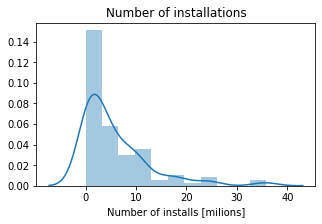

In [52]:
free_ggl3 = free_ggl2.groupby('Genres').mean()

%matplotlib inline
fig, ax = plt.subplots(figsize=(5,3))
sns.distplot(free_ggl3['install_num']/1000000)

plt.xlabel('Number of installs [milions]')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Number of installations')
plt.show()

As we can see, the distrubution is highly skewed to the right. That means there will probably occur significant outliers. We wil try to pick values filtered by IQR though.

The result is quite harder to read, however we can see that the top places belongs probably to gaming apps as well.

In [35]:
free_ggl3_iqr = free_ggl3['install_num'][free_ggl3['install_num'].between(free_ggl3['install_num'].quantile(.25), free_ggl3['install_num'].quantile(.75), inclusive=True)]
free_ggl3_iqr = (free_ggl3_iqr
                 .sort_values()
                 .to_frame()
                 .rename(columns={"install_num":"installs count"})
                
                )
free_ggl3_iqr.head(20)

,installs count
Genres,
Parenting;Brain Games,1.000000e+06
Health & Fitness;Action & Adventure,1.000000e+06
Strategy;Creativity,1.000000e+06
Arcade;Pretend Play,1.000000e+06
Entertainment;Education,1.000000e+06
Entertainment;Action & Adventure,1.000000e+06
Strategy;Action & Adventure,1.000000e+06
Racing;Pretend Play,1.000000e+06
Education;Action & Adventure,1.000000e+06


### 2) iOS App Store


Same approach as before works for the iOS dataset (now we are using the approximation by user ratings as mentioned above):

In [36]:
free_ios2

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,English
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,True
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1,True
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1,True
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1,True
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164,1065550288,Tchapper Messenger - Keep it private,82187264,USD,0.0,0,0,0.0,0.0,2.5,4+,Lifestyle,37,0,9,1,True
7177,1168960919,Golden Lotus Slots,111412224,USD,0.0,0,0,0.0,0.0,1.1.0,17+,Games,37,5,3,1,True
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,1.0.9,4+,Games,38,5,1,1,True
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,1.1.2,12+,Games,37,2,2,1,True


In [37]:
free_ios3 = (free_ios2.groupby('prime_genre')
             .mean()['rating_count_tot']
             .sort_values(ascending=False)
             .to_frame()
            
            )
free_ios3

,rating_count_tot
prime_genre,
Navigation,102592.000000
Reference,84258.250000
Social Networking,75253.843750
Music,55396.015873
Weather,48275.576923
Travel,34115.575758
Food & Drink,33333.923077
Photo & Video,29249.766667
Shopping,28517.729730


### 3) Conclusion

In this case, leading genres are differs a lot from ones on Android market. However, we have to consider that we made an approximation by number of user ratings. Based on our results, leading genres are more "serious" than gaming. Maybe that could explain the situation - gaming apps users could be kids most likely, who just download the game and play, not caring about rating the app.

**In the end, building a game app seems again as a good idea.**